In [ ]:
import pandas as pd

file_path = "trace_220521-10-1.xls"
df = pd.read_excel(file_path)
df = df.drop('File Name',axis=1)
df.head()

In [14]:
#%matplotlib widgetを使うために必要
#pip install ipympl

Dropdown(description='Channel:', options=('SPKC01', 'SPKC03', 'SPKC04', 'SPKC05', 'SPKC06', 'SPKC07', 'SPKC08'…

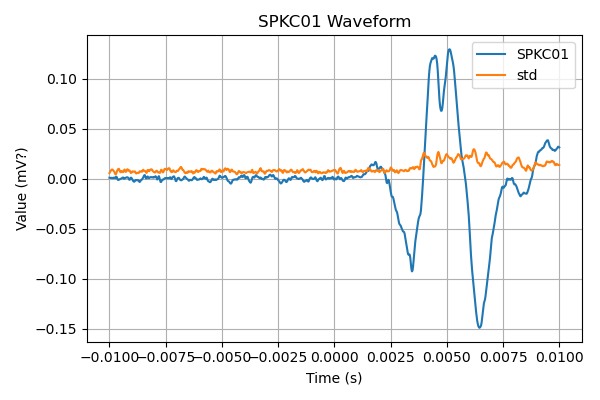

In [19]:
#vs code上でinlineモードで動的に動かすときなどに必要

%matplotlib widget 

import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

# 重複を除いたチャンネル名のリストを作成
options = list(dict.fromkeys(label.split(' ')[0] for label in df.columns))

# ドロップダウン作成
dropdown1 = widgets.Dropdown(
    options=options,
    description='Channel:',
    value=options[0]
)

# Figure と Axes を一度作って使い回す
fig1, ax1 = plt.subplots(figsize=(6, 4))

def make_figure1(spk: str, df):
    """指定したスパイクチャンネルの波形を描画"""
    label_val = spk + " Values"
    label_std = spk + " St. Dev."
    label_t = spk + " Timestamps"

    # 前の描画を消去
    ax1.clear() 
    
    ax1.plot(df[label_t], df[label_val], '-', label=spk)
    ax1.plot(df[label_t], df[label_std], '-', label="std")
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Value (mV?)')
    ax1.set_title(spk + " Waveform")
    ax1.legend()
    ax1.grid(True)
    fig1.tight_layout()
    fig1.canvas.draw()  # 再描画

# コールバック関数（ドロップダウン変更時に呼ばれる）
def on_change1(change):
    if change['type'] == 'change' and change['name'] == 'value':
        make_figure1(change['new'], df=df)

# イベントを監視
dropdown1.observe(on_change1)

# 最初の描画とドロップダウン表示
display(dropdown1)
make_figure1(dropdown1.value, df=df)


Dropdown(description='Channel:', options=('SPKC01', 'SPKC03', 'SPKC04', 'SPKC05', 'SPKC06', 'SPKC07', 'SPKC08'…

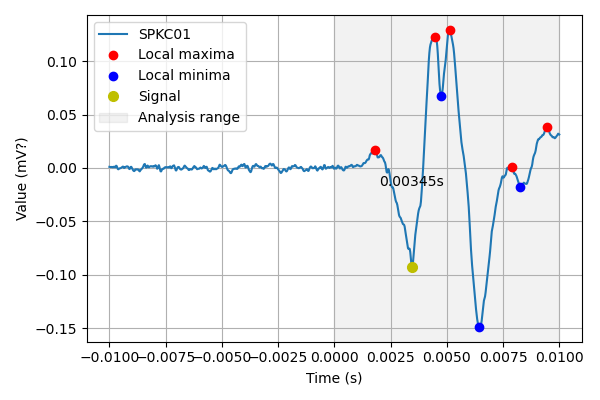

In [16]:
#波の位置に印をつける。
%matplotlib widget
import numpy as np
from scipy.signal import find_peaks



# ドロップダウン作成
dropdown2 = widgets.Dropdown(
    options=options,
    description='Channel:',
    value=options[0]
)


fig2, ax2 = plt.subplots(figsize=(6, 4))
# 結果表示
def make_figure2(spk:str, df):

    label_val = spk + " Values"
    label_std = spk + " St. Dev."
    label_t = spk + " Timestamps"

    # 範囲制限
    xmin, xmax = 0, 0.01

    # 局所最大値・最小値検出
    # find_peaksのオプションでピークの高さや間隔を制御可能
    lmax, _ = find_peaks(df[label_val], distance=15, prominence=0.01)
    lmin, _ = find_peaks(-df[label_val], distance=15, prominence=0.01)
    lmax_in_range = [p for p in lmax if xmin <= df[label_t][p] <= xmax]
    lmin_in_range = [t for t in lmin if xmin <= df[label_t][t] <= xmax]

    # シグナル検出
    signal, _ = find_peaks(-df[label_val], distance=15, prominence=0.03, height=0.04)
    sig_in_range = [m for m in signal if xmin+0.001 <= df[label_t][m] <= xmin + 0.005]


    # 前の描画を消去
    ax2.clear() 
    #波の描画
    ax2.plot(df[label_t], df[label_val], label=spk)
    #ピークの印をプロット
    ax2.plot(df[label_t][lmax_in_range], df[label_val][lmax_in_range], 'ro', label='Local maxima') 
    ax2.plot(df[label_t][lmin_in_range], df[label_val][lmin_in_range], 'bo', label='Local minima')
    # シグナルの位置をプロット
    ax2.plot(df[label_t][sig_in_range], df[label_val][sig_in_range], 'yo', markersize= 7, label='Signal')
    
    ax2.text(df[label_t][sig_in_range].values[0], df[label_t][sig_in_range].values[0]-0.02, f"{df[label_t][sig_in_range].values[0]}s", ha='center')

    # その他の設定
    ax2.axvspan(xmin, xmax, color='gray', alpha=0.1, label='Analysis range')
    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel('Value (mV?)')
    ax1.set_title(spk + " Waveform with peaks")
    ax2.legend()
    ax2.grid(True)
    fig2.tight_layout()
    fig2.canvas.draw()  # 再描画

# コールバック関数（ドロップダウン変更時に呼ばれる）
def on_change2(change):
    if change['type'] == 'change' and change['name'] == 'value':
        make_figure2(change['new'], df=df)

# イベントを監視
dropdown2.observe(on_change2)

# 最初の描画とドロップダウン表示
display(dropdown2)
make_figure2(dropdown2.value, df=df)


In [17]:
sig_times = []
for spk in options:
    label_val = spk + " Values"
    label_std = spk + " St. Dev."
    label_t = spk + " Timestamps"
    xmin, xmax = 0, 0.01
    signal, _ = find_peaks(-df[label_val], distance=15, prominence=0.03, height=0.04)
    sig_in_range = [m for m in signal if xmin+0.001 <= df[label_t][m] <= xmin + 0.005]
    sig_times.append(df[label_t].iloc[sig_in_range[0]])
print(sig_times)

[0.00345, 0.00355, 0.00345, 0.003275, 0.003775, 0.003275, 0.003275, 0.00345]


Dropdown(description='Channel:', options=('SPKC01', 'SPKC03', 'SPKC04', 'SPKC05', 'SPKC06', 'SPKC07', 'SPKC08'…

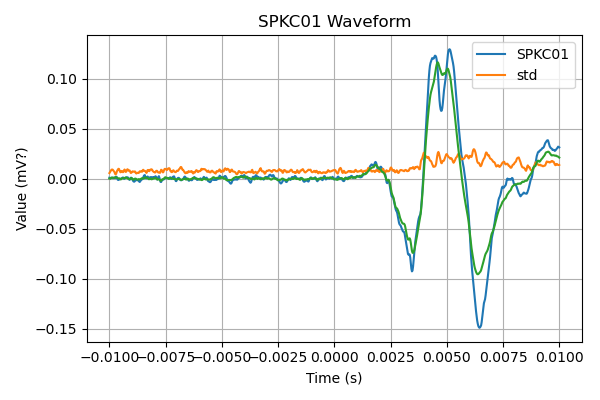

In [18]:
a = [item + " Values" for item in options]
df['mean'] = df[a].mean(axis =1)

#vs code上でinlineモードで動的に動かすときなどに必要
%matplotlib widget 

import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

# ドロップダウン作成
dropdown3 = widgets.Dropdown(
    options=options,
    description='Channel:',
    value=options[0]
)

# Figure と Axes を一度作って使い回す
fig3, ax3 = plt.subplots(figsize=(6, 4))

def make_figure3(spk: str, df):
    """指定したスパイクチャンネルの波形を描画"""
    label_val = spk + " Values"
    label_std = spk + " St. Dev."
    label_t = spk + " Timestamps"

    # 前の描画を消去
    ax3.clear() 
    ax3.plot(df[label_t], df[label_val], '-', label=spk)
    ax3.plot(df[label_t], df[label_std], '-', label="std")
    ax3.plot(df['SPKC01 Timestamps'],df['mean'], '-')
    ax3.set_xlabel('Time (s)')
    ax3.set_ylabel('Value (mV?)')
    ax3.set_title(spk + " Waveform")
    ax3.legend()
    ax3.grid(True)
    fig3.tight_layout()
    fig3.canvas.draw()  # 再描画

# コールバック関数（ドロップダウン変更時に呼ばれる）
def on_change3(change):
    if change['type'] == 'change' and change['name'] == 'value':
        make_figure3(change['new'], df=df)

# イベントを監視
dropdown3.observe(on_change3)

# 最初の描画とドロップダウン表示
display(dropdown3)
make_figure3(dropdown3.value, df=df)
